## **Importing Necessary Library**

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


### **Load the Dataset**

In [40]:
df=pd.read_csv('/content/train.csv')

In [41]:
df.head(10) # see top 10 rows of the dataset

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000
5,14095,10.0,21436,14,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5,served in a snifter; on-tap at CBC.\t\tcolor i...,"{'min': 16, 'hour': 1, 'mday': 20, 'sec': 9, '...",1324343769,NaN,NaN,NaN,NaN,perrymarcus
6,13759,12.6,10001,14,Benevolence,American Wild Ale,4.0,4.5,4.0,4.0,4.0,my 100th review on-tap! mini snifter\t\t A nut...,"{'min': 1, 'hour': 18, 'mday': 8, 'sec': 12, '...",1244484072,NaN,NaN,NaN,NaN,GratefulBeerGuy
7,3914,8.4,52211,14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,4.0,4.0,4.0,4.0,One of the better pumpkin ales I've tried so f...,"{'min': 32, 'hour': 20, 'mday': 9, 'sec': 40, ...",1286656360,NaN,NaN,NaN,NaN,Daniellobo
8,47953,9.0,34361,394,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5,4.0,4.5,4.5,4.5,A snifter filled (several times over) from a 7...,"{'min': 26, 'hour': 3, 'mday': 16, 'sec': 13, ...",1279250773,NaN,NaN,NaN,Male,msubulldog25
9,7047,6.2,32676,1386,One Hop Wonder IPA,American IPA,2.0,2.0,2.0,2.5,2.0,"Brewed with five hop additions, this alleged I...","{'min': 26, 'hour': 5, 'mday': 16, 'sec': 41, ...",1160976401,NaN,NaN,NaN,NaN,RedDiamond


##**Exploratory Data Analysis (EDA)**

In [42]:
print(df.isnull().sum())

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64


In [43]:
df.shape

(37500, 19)

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

**Correlation for numerical columns**

* Features like review/taste, review/palate, review/aroma, and review/appearance are strong predictors and should definitely be kept.
* Features like beer/ABV can also be retained because they may still contribute to the model.
* Columns such as review/timeUnix, index, user/ageInSeconds, user/birthdayUnix, **beer/beerId**, and **beer/brewerId** have very weak correlations, suggesting they might not be very useful.

In [45]:
numerical_cols = df.select_dtypes(include=np.number).columns  # Select only numerical columns
correlations = df[numerical_cols].corr()['review/overall'].sort_values(ascending=False)
print(correlations)

review/overall       1.000000
review/taste         0.785220
review/palate        0.697220
review/aroma         0.616117
review/appearance    0.498733
beer/ABV             0.197005
review/timeUnix      0.065383
index                0.054493
user/birthdayUnix    0.045642
beer/beerId         -0.021981
user/ageInSeconds   -0.045642
beer/brewerId       -0.084932
Name: review/overall, dtype: float64


**Plot correlation heatmap**

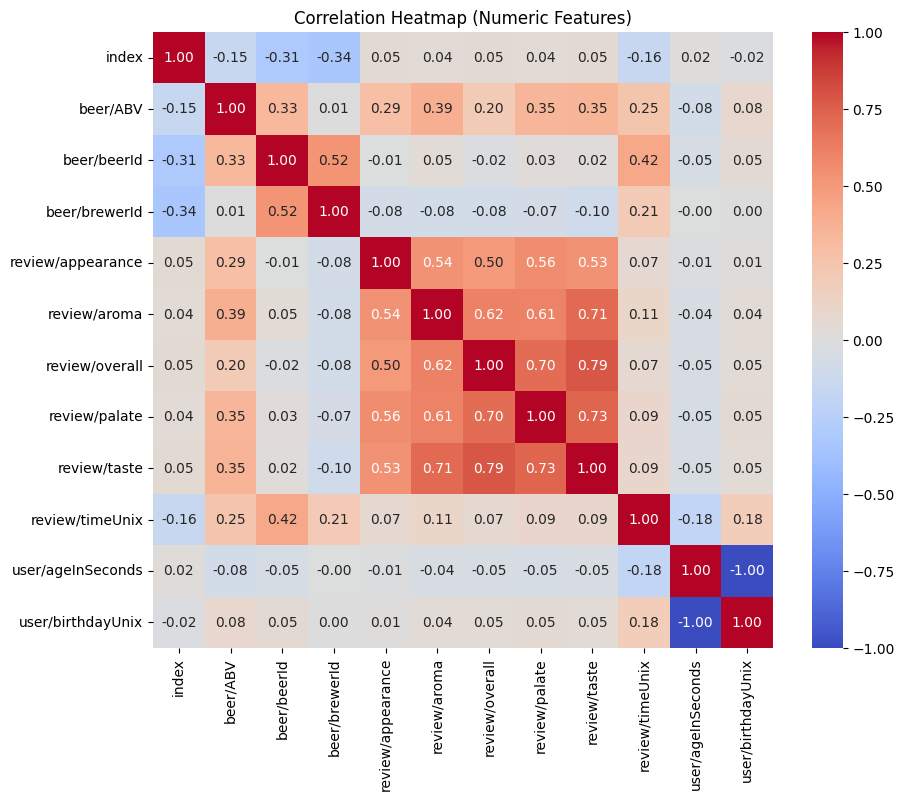

In [46]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

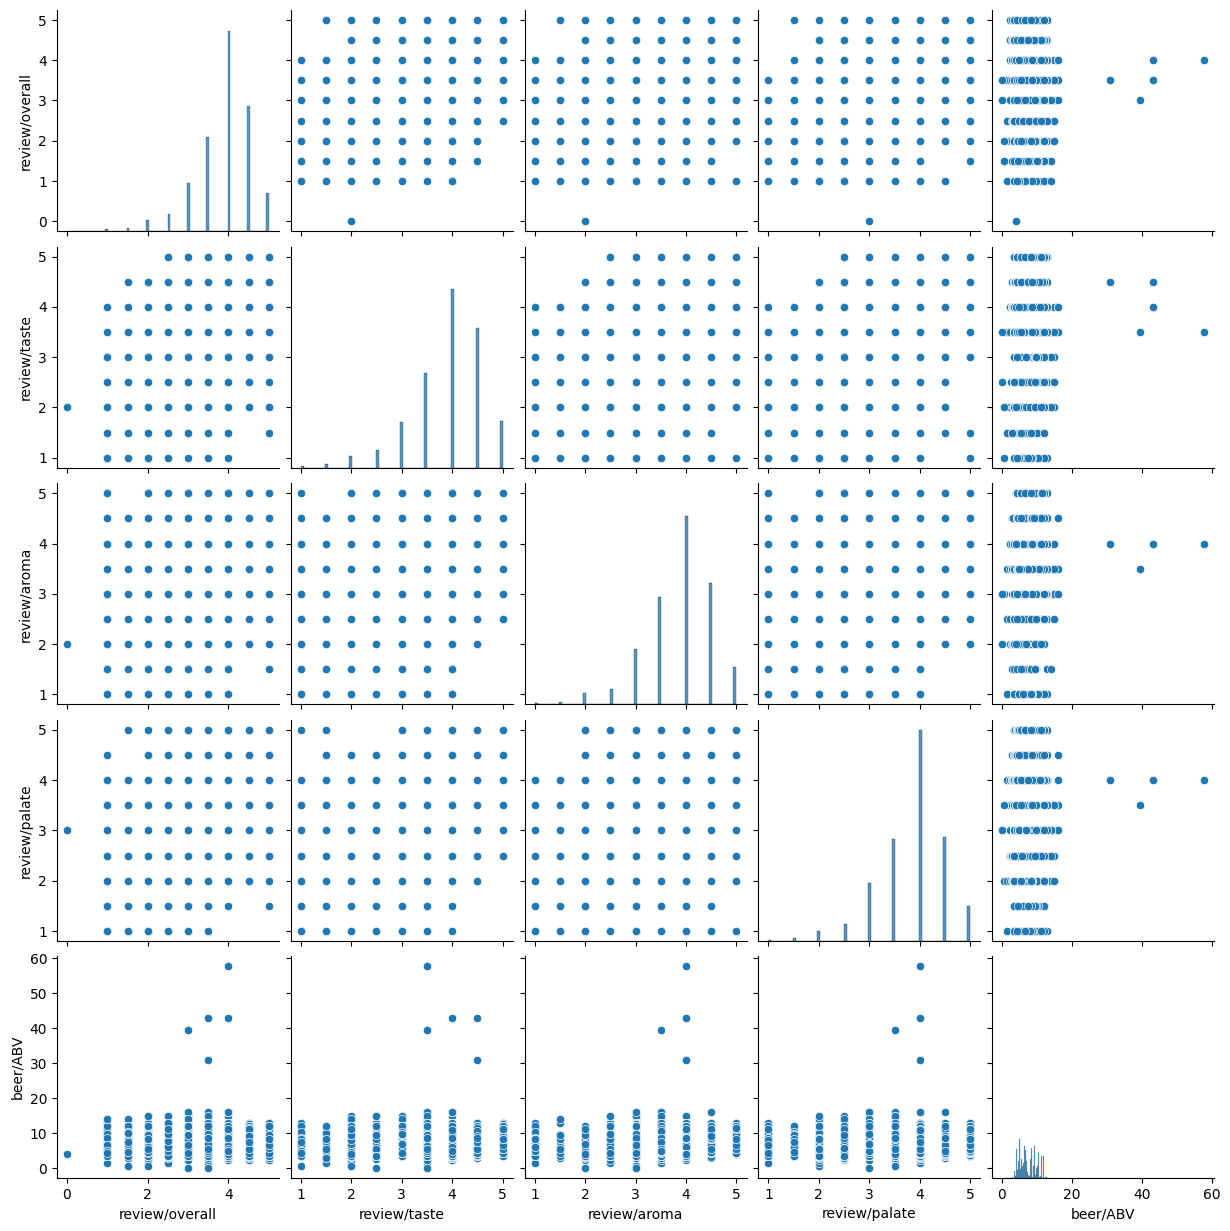

In [47]:
sns.pairplot(df[['review/overall', 'review/taste', 'review/aroma', 'review/palate', 'beer/ABV']])
plt.show()


##**Data Cleaning and Preprocessing**



*   Drop unnecessary columns
*   Drop rows with missing review/text
*   Fill missing user/gender with 'Unknown'



In [49]:
# Drop unnecessary columns
df = df.drop(columns=['review/timeStruct', 'user/birthdayRaw', 'user/birthdayUnix', 'user/ageInSeconds'])

# Drop rows with missing review/text and user/profileName
df = df.dropna(subset=['review/text', 'user/profileName'])

# Fill missing user/gender with 'Unknown'
df['user/gender'].fillna('Unknown', inplace=True)
# Impute missing values
# For numerical columns, replace with median
df['beer/ABV'].fillna(df['beer/ABV'].median(), inplace=True)

In [50]:
print(df.isnull().sum())

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeUnix      0
user/gender          0
user/profileName     0
dtype: int64


## **Feature Engineering**

In [51]:
#2.1 Handling Text Features - 'review/text'
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['review/text'])
# Label Encoding for categorical columns
label_encoder_name = LabelEncoder()
label_encoder_style = LabelEncoder()
label_encoder_gender = LabelEncoder()

df['beer/name_encoded'] = label_encoder_name.fit_transform(df['beer/name'])
df['beer/style_encoded'] = label_encoder_style.fit_transform(df['beer/style'])
df['user/gender_encoded'] = label_encoder_gender.fit_transform(df['user/gender'])

# 2.3 Combining Ratings as New Feature
df['average_review'] = df[['review/appearance', 'review/aroma', 'review/palate', 'review/taste']].mean(axis=1)

# Prepare numerical features
numerical_features = df[['beer/ABV', 'review/appearance', 'review/aroma',
                         'review/palate', 'review/taste', 'beer/name_encoded',
                         'beer/style_encoded', 'user/gender_encoded']]

# Combine TF-IDF matrix with numerical features
X_text = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
X = pd.concat([numerical_features.reset_index(drop=True), X_text], axis=1)

# Target Variable
y = df['review/overall']


In [53]:
y

,review/overall
0,4.0
1,3.5
2,3.5
3,2.5
4,3.0
...,...
37495,3.5
37496,3.5
37497,4.0
37498,4.0


## **Splitting the dataset into two part TRAIN AND TEST**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)



Training Data Shape: (29988, 1008)
Testing Data Shape: (7497, 1008)


## **Model Training**


##**Model 1: Linear Regression**



In [55]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### **Predictions for Linear Regression**

In [56]:
y_pred_lr = lr_model.predict(X_test)

..

## **Model 2: XGBoost Regressor**


In [57]:
# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### **Predictions for XGBOOT Regressor**

In [58]:
y_pred_xgb = xgb_model.predict(X_test)

## **Evaluate Linear Regression**

In [59]:
print("\nLinear Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression Performance:
RMSE: 0.3809291173590848
R² Score: 0.6997968441470412
MAE: 0.2923817573751303


## **Evaluate XGBoost Regressor**

In [60]:
print("\nXGBoost Regressor Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost Regressor Performance:
RMSE: 0.3788422669301665
MAE: 0.2899647023624717
R² Score: 0.7030770505192991


### **Model Comparison**


               Model       MAE       MSE        R2
0  Linear Regression  0.292382  0.145107  0.699797
1            XGBoost  0.289965  0.143521  0.703077


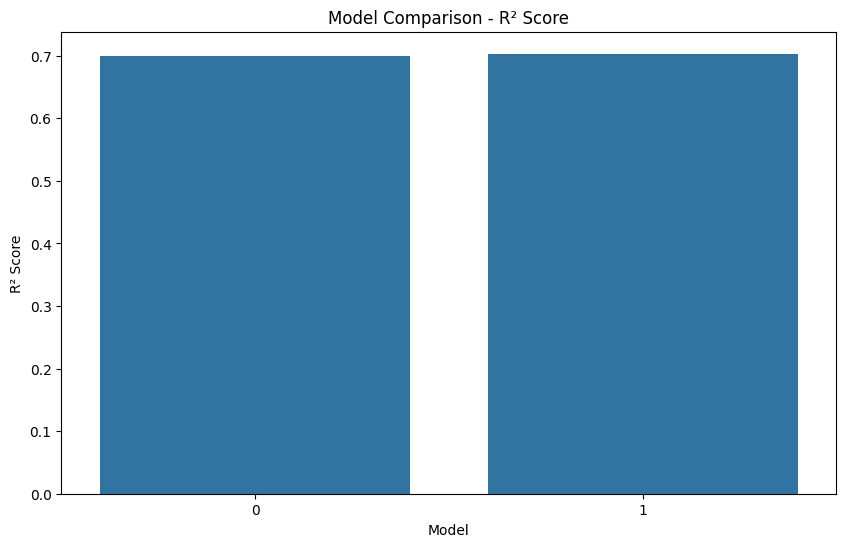

In [63]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Linear Regression Evaluation
mae_linear, mse_linear, r2_linear = evaluate_model(y_test, y_pred_lr)

# XGBoost Evaluation
mae_xgboost, mse_xgboost, r2_xgboost = evaluate_model(y_test, y_pred_xgb)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'XGBoost'],
    'MAE': [mae_linear, mae_xgboost],
    'MSE': [mse_linear, mse_xgboost],
    'R2': [r2_linear, r2_xgboost]
})

print(comparison_df)




plt.figure(figsize=(10, 6))
sns.barplot(x=comparison_df.index, y=comparison_df['R2'])
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.show()
